Name       : Abhishek P. Trivedi

Student_id : C0894312

Subject    : NN & DL

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission_df = pd.read_csv('SampleSubmission.csv')

In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(train_df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(train_df.isnull().sum())

# Fill missing salary values with 0 (because not placed students have no salary)
train_df['salary'].fillna(0, inplace=True)
test_df['salary'].fillna(0, inplace=True)

# Drop rows with missing values
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)


First few rows of the dataset:
   sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1       0  67.00   Others  91.00   Others  Commerce     58.00   
1      2       0  79.33  Central  78.33   Others   Science     77.48   
2      3       0  65.00  Central  68.00  Central      Arts     64.00   
3      4       0  56.00  Central  52.00  Central   Science     52.00   
4      5       0  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       0.0  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  

Missing values in the dataset:
sl_no             0
gender            0
ssc_p         

In [7]:
# Encode categorical features using LabelEncoder
label_encoders = {}
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

for column in categorical_columns:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    label_encoders[column] = le

In [8]:
# Define the features (X) and target (y)
X = train_df.drop(columns=['sl_no', 'status', 'salary'])
y = train_df['status']

# Split the dataset into training and test sets (70% training and 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# List of models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42) }

In [11]:
# Dictionary to store the results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': [],
    'Confusion Matrix': []
}

In [15]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store the results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['ROC-AUC'].append(roc_auc)
    results['Confusion Matrix'].append(conf_matrix)

# Print the results
print("\nModel Evaluation Results:")
results_df = pd.DataFrame(results)
print(results_df)


Model Evaluation Results:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0  Logistic Regression  0.800000   0.816327  0.909091  0.860215  0.922078   
1        Decision Tree  0.784615   0.826087  0.863636  0.844444  0.741342   
2        Random Forest  0.800000   0.792453  0.954545  0.865979  0.892316   
3                  SVM  0.784615   0.777778  0.954545  0.857143  0.873377   
4                 k-NN  0.784615   0.777778  0.954545  0.857143  0.841991   
5    Gradient Boosting  0.800000   0.816327  0.909091  0.860215  0.872294   

      Confusion Matrix  
0   [[12, 9], [4, 40]]  
1   [[13, 8], [6, 38]]  
2  [[10, 11], [2, 42]]  
3   [[9, 12], [2, 42]]  
4   [[9, 12], [2, 42]]  
5   [[12, 9], [4, 40]]  


In [16]:
# Create and evaluate a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', models['Logistic Regression']),
    ('dt', models['Decision Tree']),
    ('rf', models['Random Forest']),
    ('svm', models['SVM']),
    ('knn', models['k-NN']),
    ('gb', models['Gradient Boosting'])
], voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)

In [17]:
# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Add Voting Classifier results to the results dictionary
results['Model'].append('Voting Classifier')
results['Accuracy'].append(accuracy_voting)
results['Precision'].append(precision_voting)
results['Recall'].append(recall_voting)
results['F1-Score'].append(f1_voting)
results['ROC-AUC'].append(roc_auc_voting)
results['Confusion Matrix'].append(conf_matrix_voting)


Updated Model Evaluation Results with Voting Classifier:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0  Logistic Regression  0.800000   0.816327  0.909091  0.860215  0.922078   
1        Decision Tree  0.784615   0.826087  0.863636  0.844444  0.741342   
2        Random Forest  0.800000   0.792453  0.954545  0.865979  0.892316   
3                  SVM  0.784615   0.777778  0.954545  0.857143  0.873377   
4                 k-NN  0.784615   0.777778  0.954545  0.857143  0.841991   
5    Gradient Boosting  0.800000   0.816327  0.909091  0.860215  0.872294   
6    Voting Classifier  0.800000   0.792453  0.954545  0.865979  0.899351   

      Confusion Matrix  
0   [[12, 9], [4, 40]]  
1   [[13, 8], [6, 38]]  
2  [[10, 11], [2, 42]]  
3   [[9, 12], [2, 42]]  
4   [[9, 12], [2, 42]]  
5   [[12, 9], [4, 40]]  
6  [[10, 11], [2, 42]]  


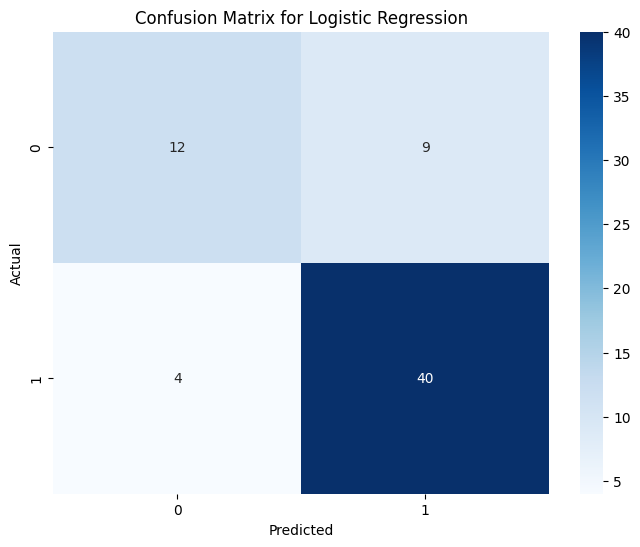

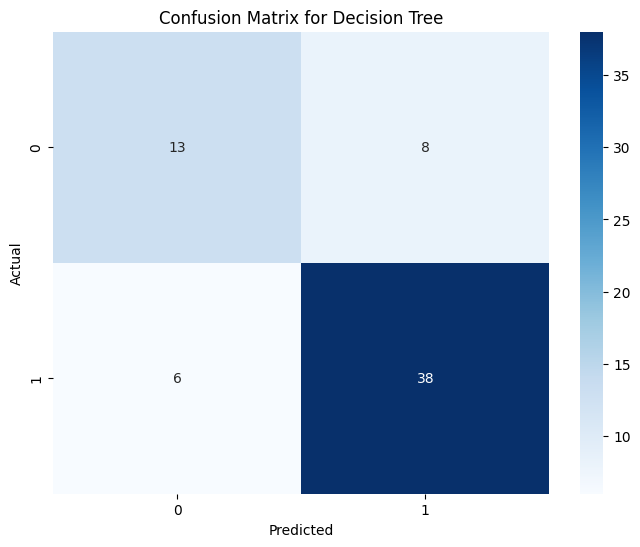

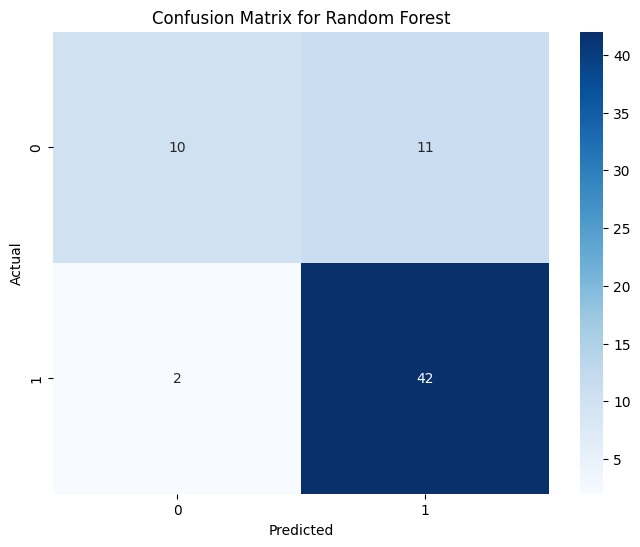

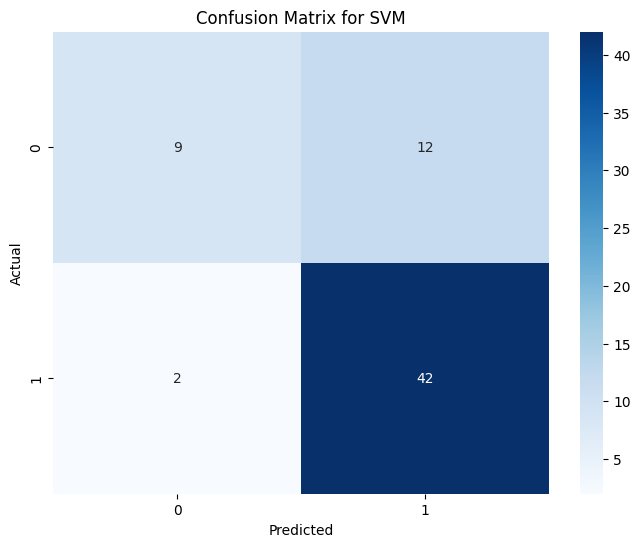

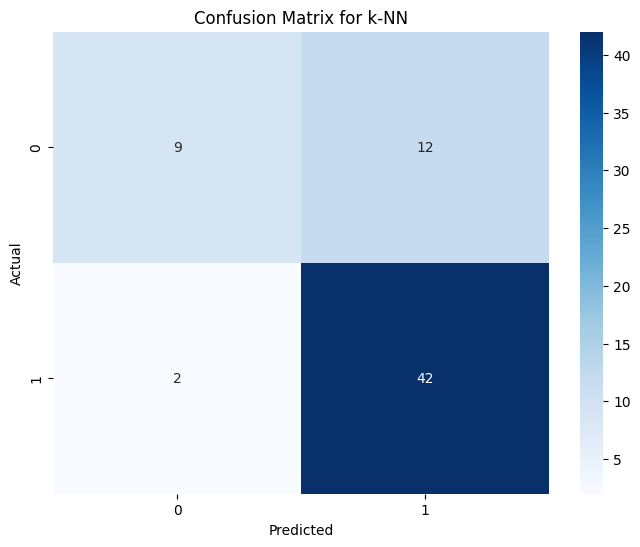

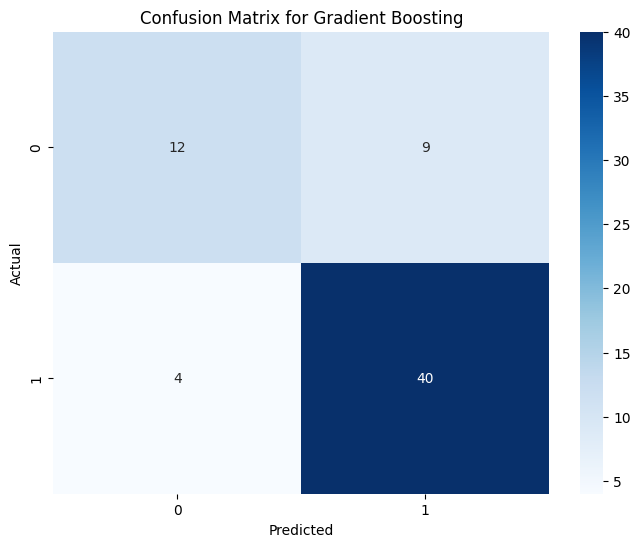

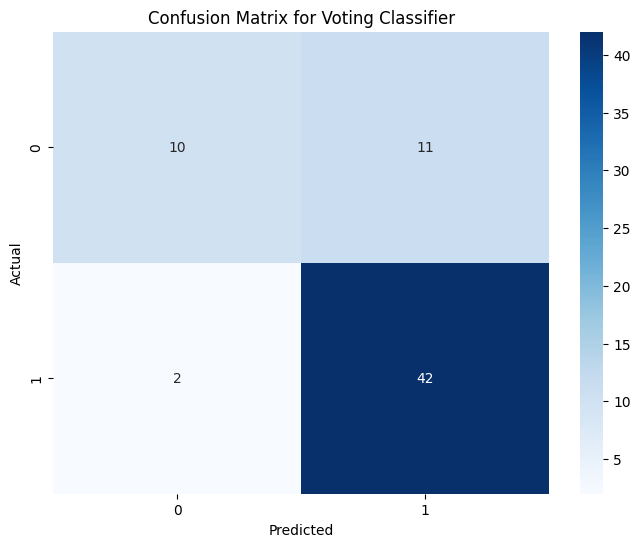

In [18]:
# Print the updated results with Voting Classifier
results_df = pd.DataFrame(results)
print("\nUpdated Model Evaluation Results with Voting Classifier:")
print(results_df)

# Visualize the confusion matrices for each model
for i, model_name in enumerate(results['Model']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(results['Confusion Matrix'][i], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()